# <center> Human Resources Analytics  </center>
### Why are our best and most experienced employees leaving prematurely?

### Field include in datasets:

#### <ul><li>Employee satisfaction level </li><li>Last evaluation</li><li>Number of projects</li><li>Average monthly hours</li><li>Time spent at the company</li><li>Whether they have had a work accident</li><li>Whether they have had a promotion in the last 5 years</li><li>Department</li><li>Salary</li><li>Whether the employee has left</li></ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
HRAnalysis = pd.read_csv("E:\\Big Data\\Project\\Human Resource Analysis\\HR_comma_sep.csv")

In [3]:
HRAnalysis.shape

(14999, 10)

In [4]:
HRAnalysis.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
HRAnalysis.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
HRAnalysis.rename(columns={"average_montly_hours":"average_monthly_hours","sales":"Department"},inplace=True)
Left_Column = HRAnalysis[['left']]
HRAnalysis.drop('left',axis=1,inplace=True)
HRAnalysis = pd.concat([HRAnalysis,Left_Column],axis=1)
HRAnalysis.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


# <center>Exploratory Data Analysis</center>

## Lets look at the features distributions visually

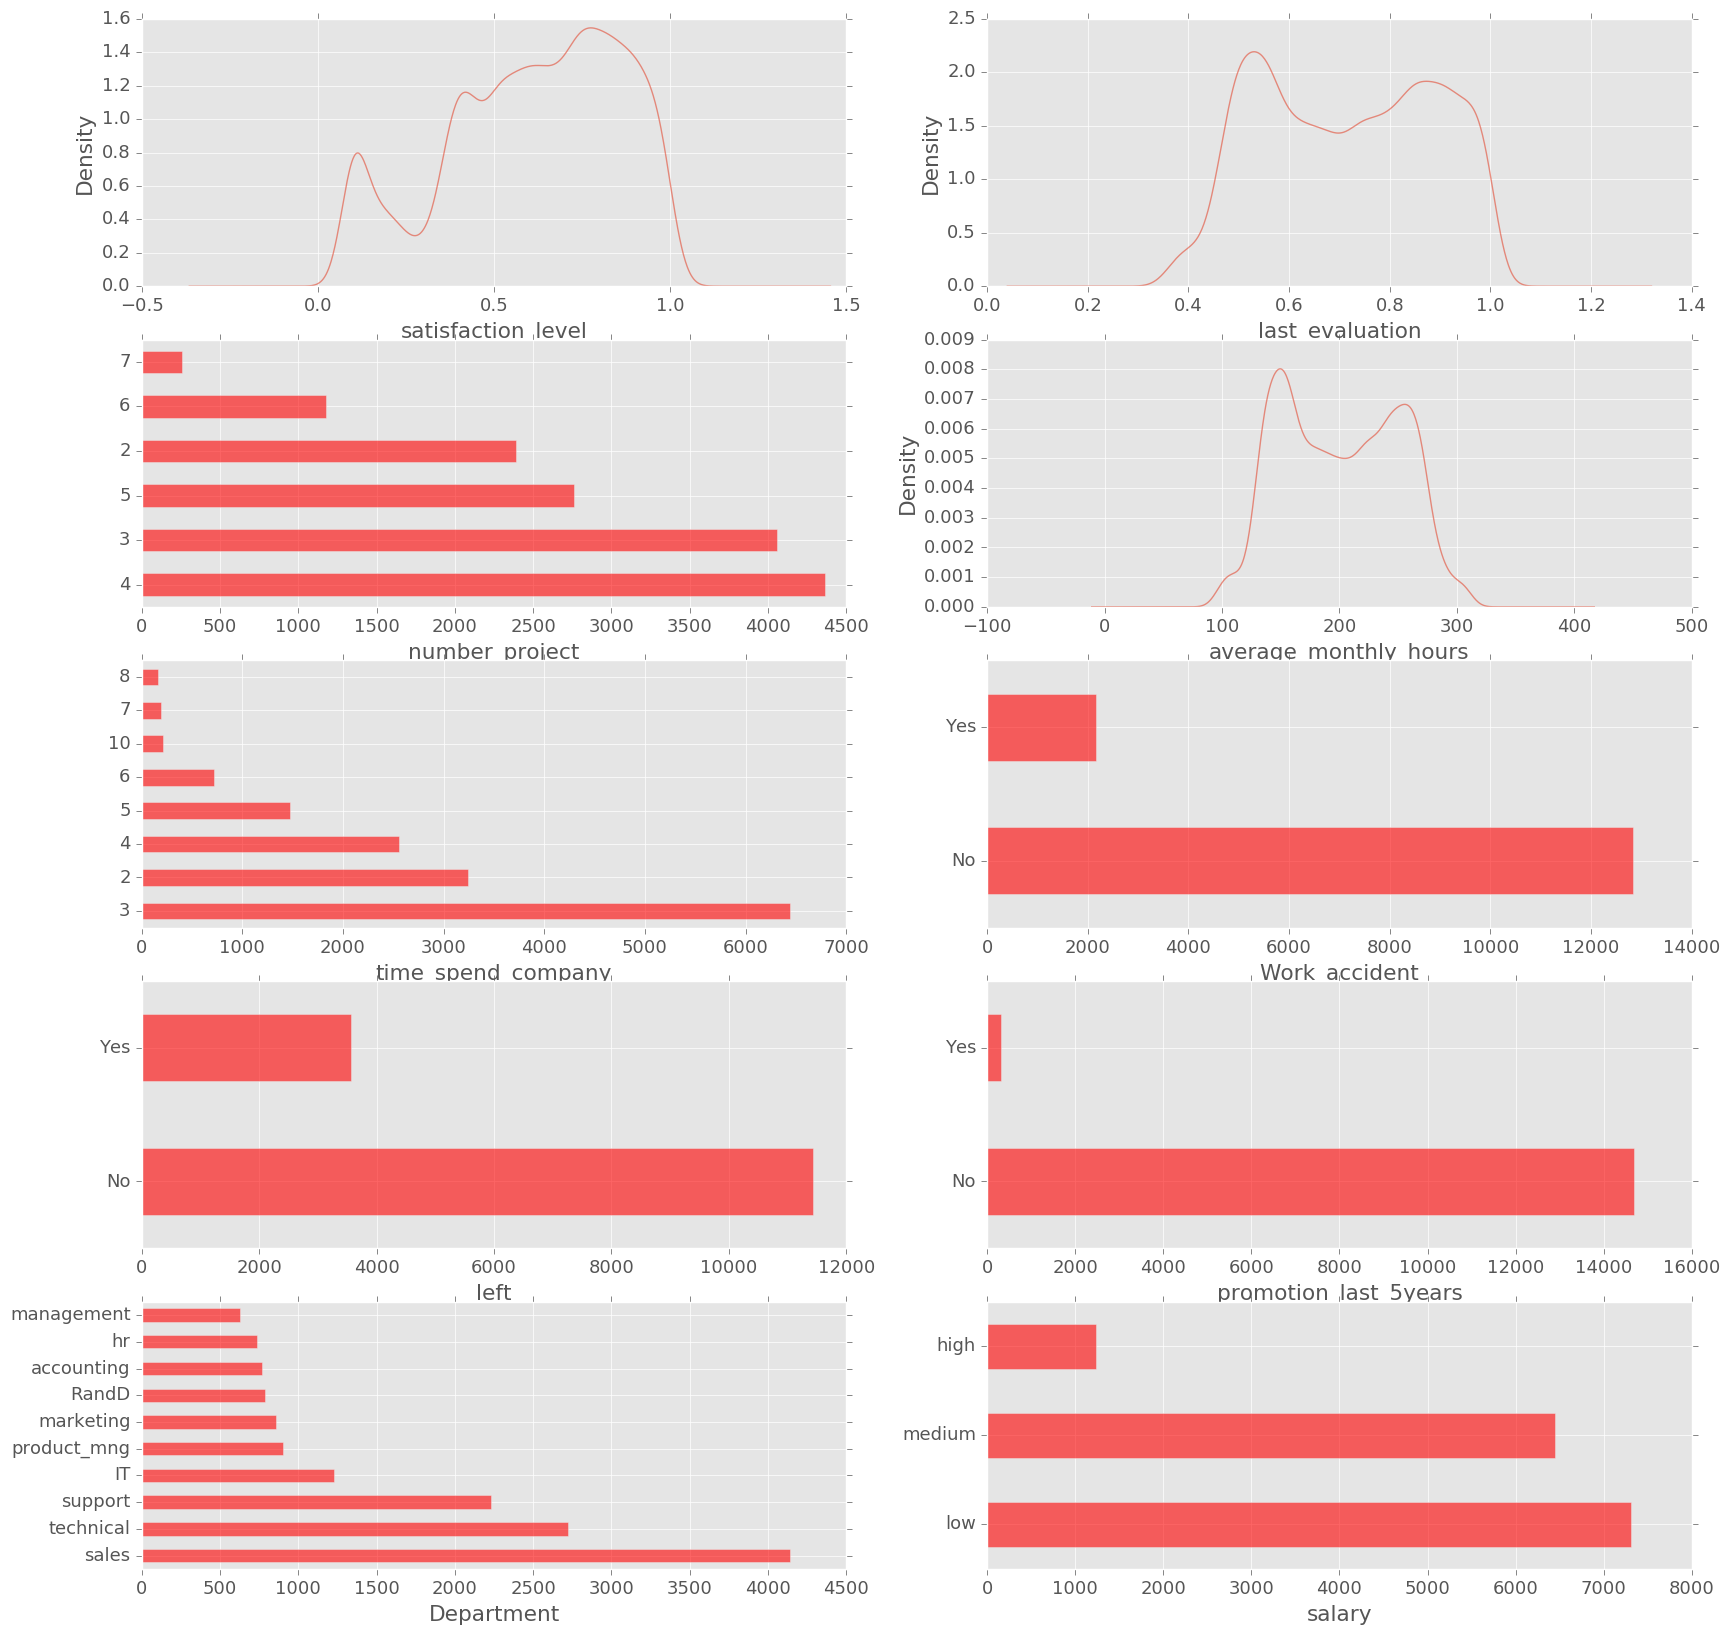

In [7]:
plt.rc("font", size=13)
plt.figure(figsize=(20,20))
alpha=0.6

ax1 = plt.subplot2grid((5,2), (0,0))
HRAnalysis.satisfaction_level.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("satisfaction_level")

ax2 = plt.subplot2grid((5,2),(0,1))
HRAnalysis.last_evaluation.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("last_evaluation")

ax3 = plt.subplot2grid((5,2),(1,0))
HRAnalysis.number_project.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax3.set_xlabel("number_project")

ax4 = plt.subplot2grid((5,2),(1,1))
HRAnalysis.average_monthly_hours.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("average_monthly_hours")

ax5 = plt.subplot2grid((5,2),(2,0))
HRAnalysis.time_spend_company.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax5.set_xlabel("time_spend_company")

ax6 = plt.subplot2grid((5,2),(2,1))
HRAnalysis.Work_accident.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax6.set_xlabel("Work_accident")
ax6.set_yticklabels(['No','Yes'])

ax7 = plt.subplot2grid((5,2),(3,0))
HRAnalysis.left.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax7.set_xlabel("left")
ax7.set_yticklabels(['No','Yes'])

ax8 = plt.subplot2grid((5,2),(3,1))
HRAnalysis.promotion_last_5years.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax8.set_xlabel("promotion_last_5years")
ax8.set_yticklabels(['No','Yes'])

ax9 = plt.subplot2grid((5,2),(4,0))
HRAnalysis.Department.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax9.set_xlabel("Department")

ax10 = plt.subplot2grid((5,2),(4,1))
HRAnalysis.salary.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax10.set_xlabel("salary")

## Observing data with respect to Job left or not

#### <ul><li>Left = 1</li><li>Not Left = 0</li></ul>

In [8]:
HRAnalysis.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left'],
      dtype='object')

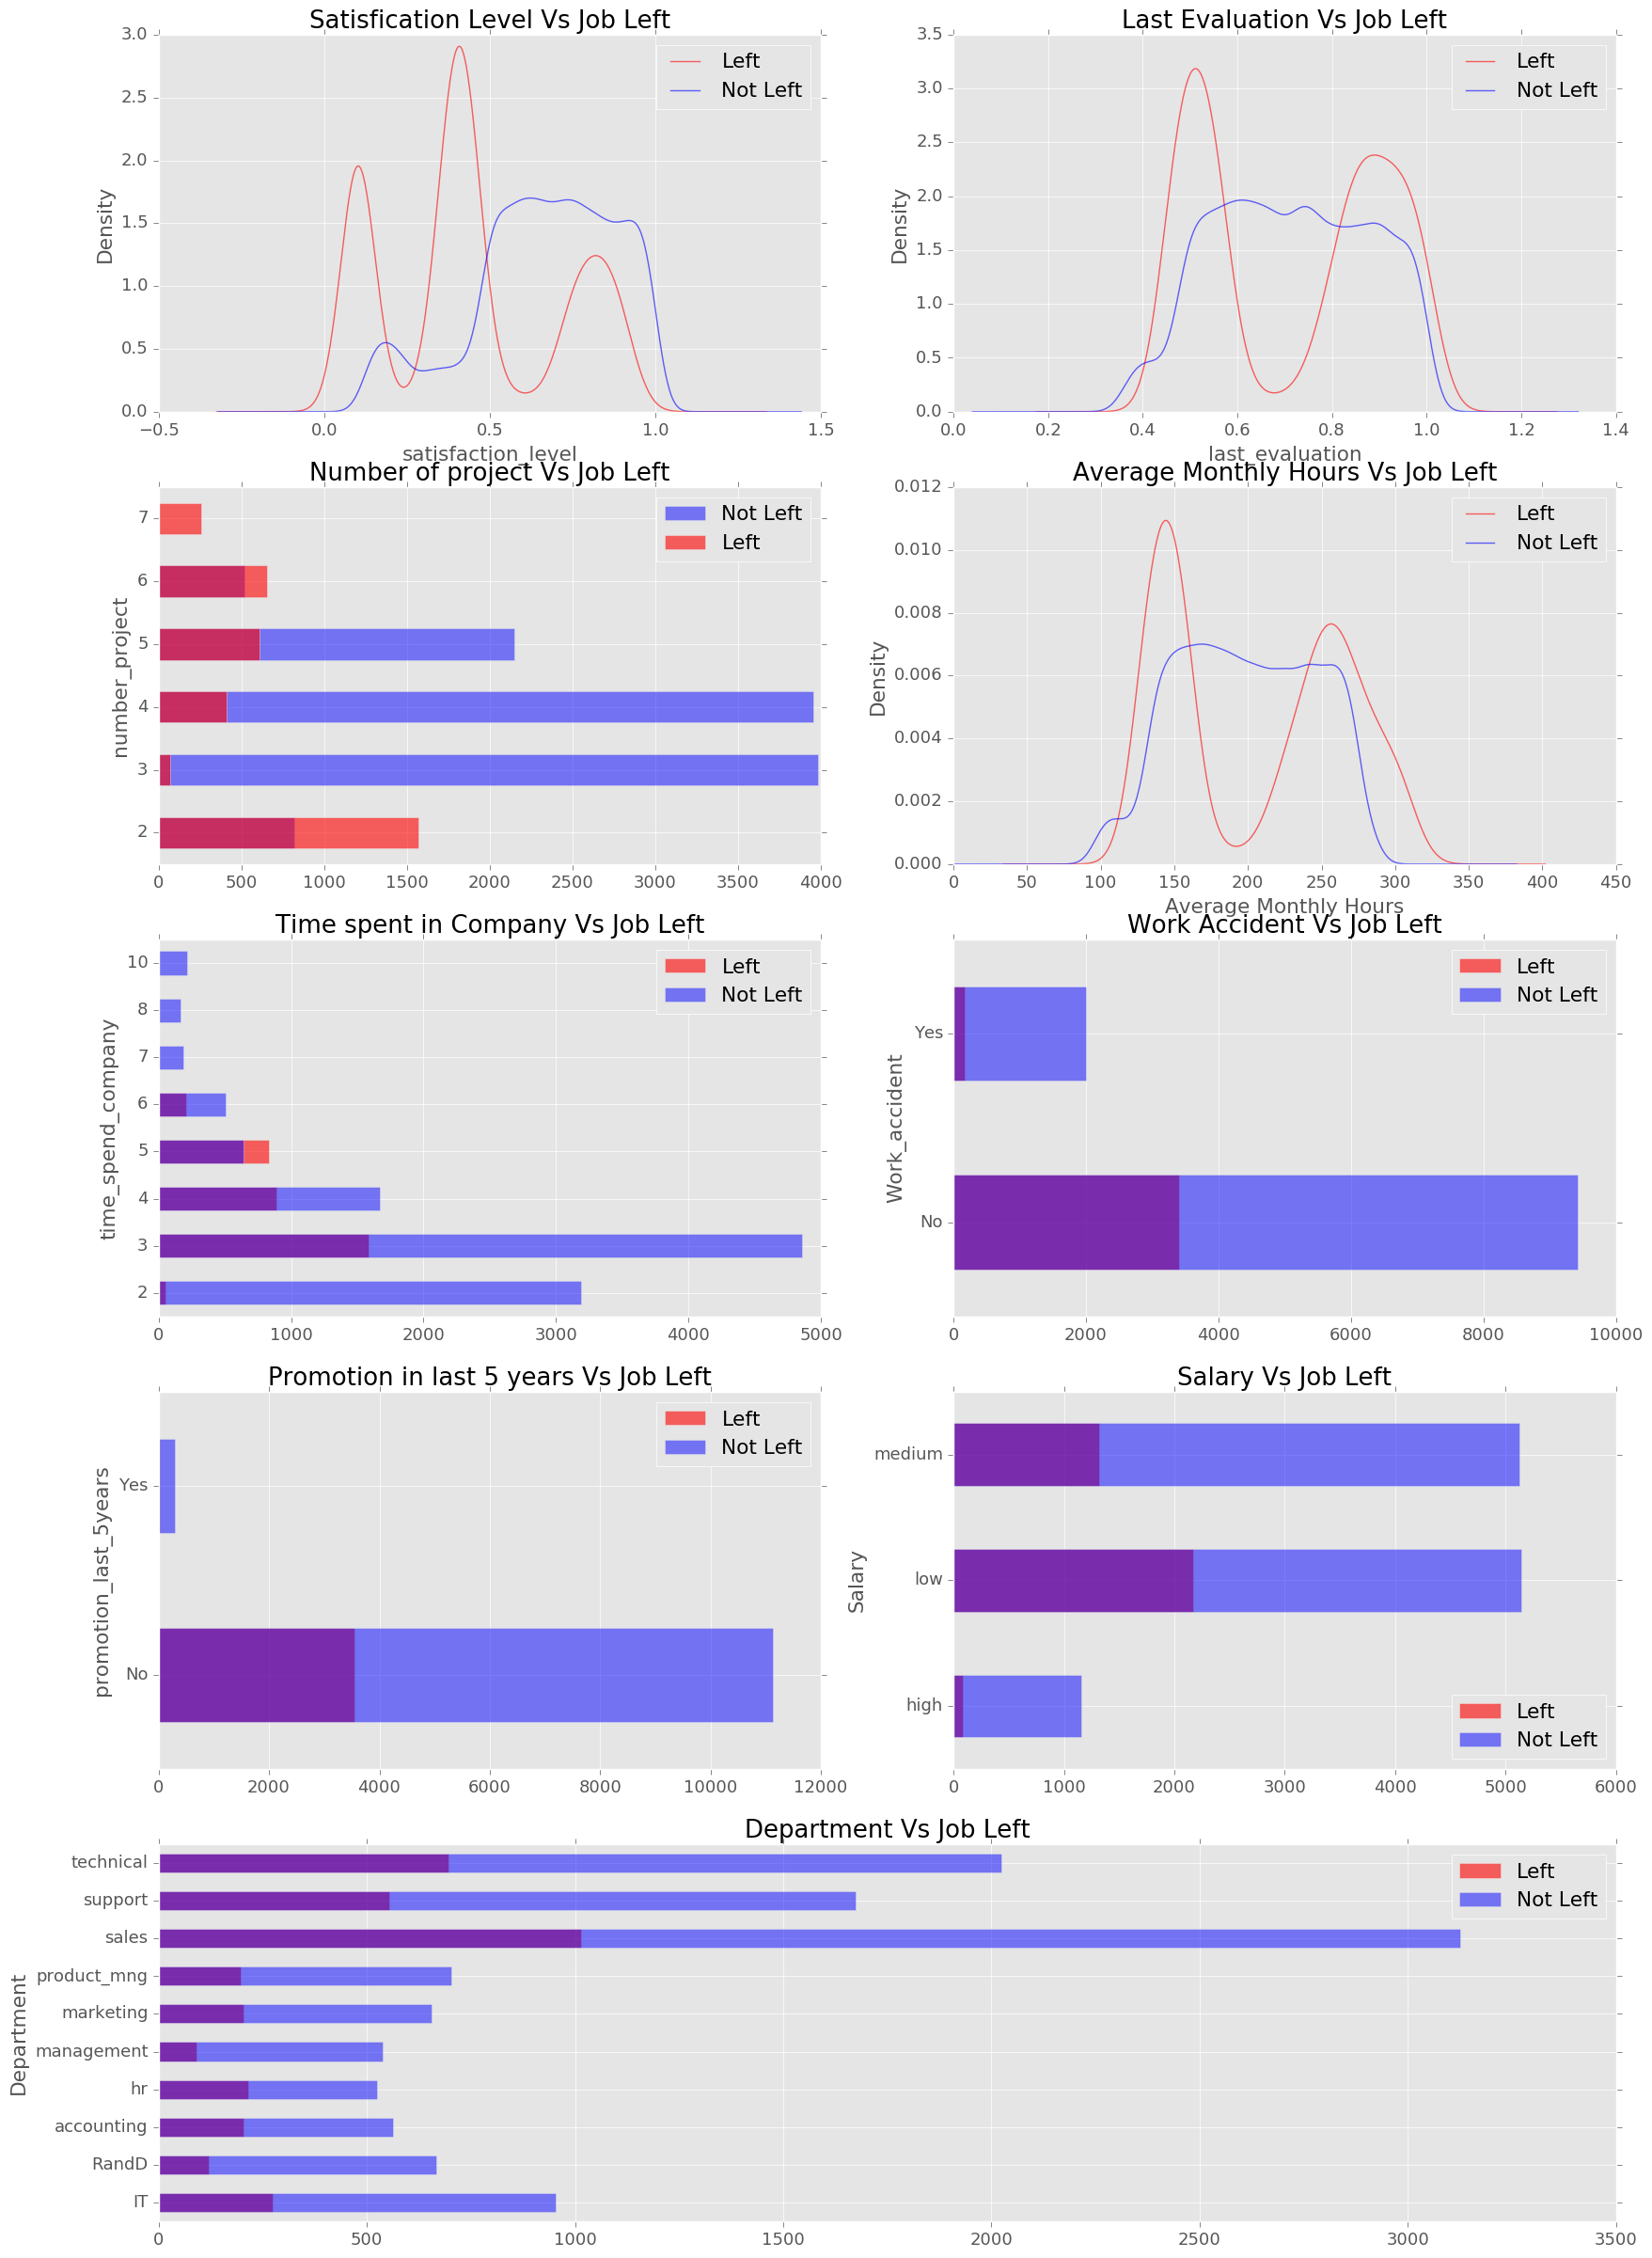

In [9]:
#satisfaction_level
fig = plt.figure(figsize=(20,30))

# Looking at the distributions, those employee whose satisfaction level has less than 0.5 had mostly left the job
ax1 = plt.subplot2grid((5,2), (0,0))
HRAnalysis[HRAnalysis.left==1].satisfaction_level.plot(kind="density",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].satisfaction_level.plot(kind="density",color="blue",label="Not Left",alpha=alpha)
ax1.set_xlabel("satisfaction_level")
ax1.set_title("Satisfication Level Vs Job Left")
plt.legend(loc="best")

# Looking at the distributions, those employee whose last evaluation rate between 0.6 to 0.8 had least job left rate
ax2 = plt.subplot2grid((5,2), (0,1))
HRAnalysis[HRAnalysis.left==1].last_evaluation.plot(kind="density",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].last_evaluation.plot(kind="density",color="blue",label="Not Left",alpha=alpha)
ax2.set_xlabel("last_evaluation")
ax2.set_title("Last Evaluation Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, those employee who were working on number of project 3,4,5 had least let their job
ax3 = plt.subplot2grid((5,2), (1,0))
HRAnalysis[HRAnalysis.left==0].number_project.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
HRAnalysis[HRAnalysis.left==1].number_project.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
ax3.set_ylabel("number_project")
ax3.set_title("Number of project Vs Job Left")
plt.legend(loc="best")

# Looking at the distributions, those employee whose average monthly hours is around 200 had least job left rate
ax4 = plt.subplot2grid((5,2), (1,1))
HRAnalysis[HRAnalysis.left==1].average_monthly_hours.plot(kind="density",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].average_monthly_hours.plot(kind="density",color="blue",label="Not Left",alpha=alpha)
ax4.set_xlabel("Average Monthly Hours")
ax4.set_title("Average Monthly Hours Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, those employee who spent hours in company had left their job more comparison to others
ax5 = plt.subplot2grid((5,2), (2,0))
HRAnalysis[HRAnalysis.left==1].time_spend_company.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].time_spend_company.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax5.set_ylabel("time_spend_company")
ax5.set_title("Time spent in Company Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, those employee who spent hours in company had let their job more comparison to others
ax6 = plt.subplot2grid((5,2), (2,1))
HRAnalysis[HRAnalysis.left==1].Work_accident.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].Work_accident.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax6.set_ylabel("Work_accident")
ax6.set_yticklabels(['No','Yes'])
ax6.set_title("Work Accident Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, no promotion in last 5 years are leaving job
ax7 = plt.subplot2grid((5,2), (3,0))
HRAnalysis[HRAnalysis.left==1].promotion_last_5years.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].promotion_last_5years.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax7.set_ylabel("promotion_last_5years")
ax7.set_yticklabels(['No','Yes'])
ax7.set_title("Promotion in last 5 years Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, low salary employee are more tends to leave job
ax8 = plt.subplot2grid((5,2), (3,1))
HRAnalysis[HRAnalysis.left==1].salary.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].salary.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax8.set_ylabel("Salary")
ax8.set_title("Salary Vs Job Left")
plt.legend(loc="best")


ax9 = plt.subplot2grid((5,2), (4,0),colspan=2)
HRAnalysis[HRAnalysis.left==1].Department.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].Department.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax9.set_ylabel("Department")
ax9.set_title("Department Vs Job Left")
plt.legend(loc="best")

### Check data based on satisfaction  level

In [10]:
SatLevel_lessthan_5 = HRAnalysis[HRAnalysis.satisfaction_level <= 0.5]
SatLevel_greaterthan_5 = HRAnalysis[HRAnalysis.satisfaction_level > 0.5]

print("Percentage of employees left or not based on satisfication level")
print("Not Left percentage when satisfaction level <= 0.5 is ", int((SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].shape[0]/SatLevel_lessthan_5.shape[0])*100))
print("Left percentage when satisfaction level <= 0.5 is ", int((SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].shape[0]/SatLevel_lessthan_5.shape[0])*100))
print("-------------------------------------------------------------------")
print("Not Left percentage when satisfaction level > 0.5 is ", int((SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].shape[0]/SatLevel_greaterthan_5.shape[0])*100))
print("Left percentage when satisfaction level > 0.5 is ",int((SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].shape[0]/SatLevel_greaterthan_5.shape[0])*100))

Percentage of employees left or not based on satisfication level
Not Left percentage when satisfaction level <= 0.5 is  47
Left percentage when satisfaction level <= 0.5 is  52
-------------------------------------------------------------------
Not Left percentage when satisfaction level > 0.5 is  89
Left percentage when satisfaction level > 0.5 is  10


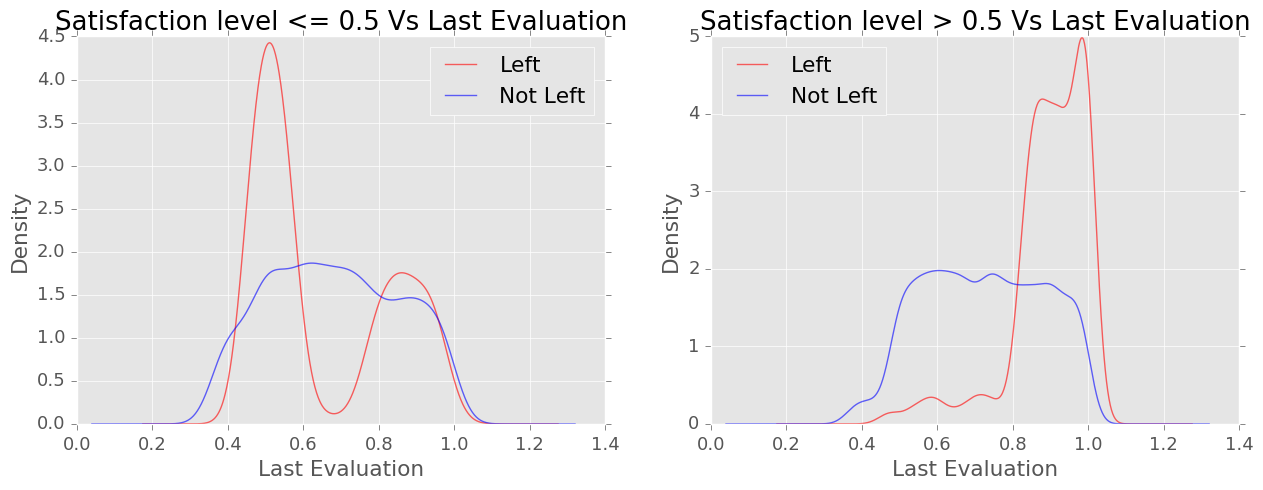

In [11]:
fig = plt.figure(figsize=(15, 5))

ax1 =  plt.subplot2grid((1,2),(0,0))
SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].last_evaluation.plot(kind="density",color="red",alpha=0.6,label="Left")
SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].last_evaluation.plot(kind="density",color="blue",alpha=0.6,label="Not Left")
ax1.set_xlabel("Last Evaluation")
ax1.set_title("Satisfaction level <= 0.5 Vs Last Evaluation")
plt.legend(loc="best")


ax2 =  plt.subplot2grid((1,2),(0,1))
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].last_evaluation.plot(kind="density",color="red",alpha=0.6,label="Left")
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].last_evaluation.plot(kind="density",color="blue",alpha=0.6,label="Not Left")
ax2.set_xlabel("Last Evaluation")
ax2.set_title("Satisfaction level > 0.5 Vs Last Evaluation")
plt.legend(loc="best")

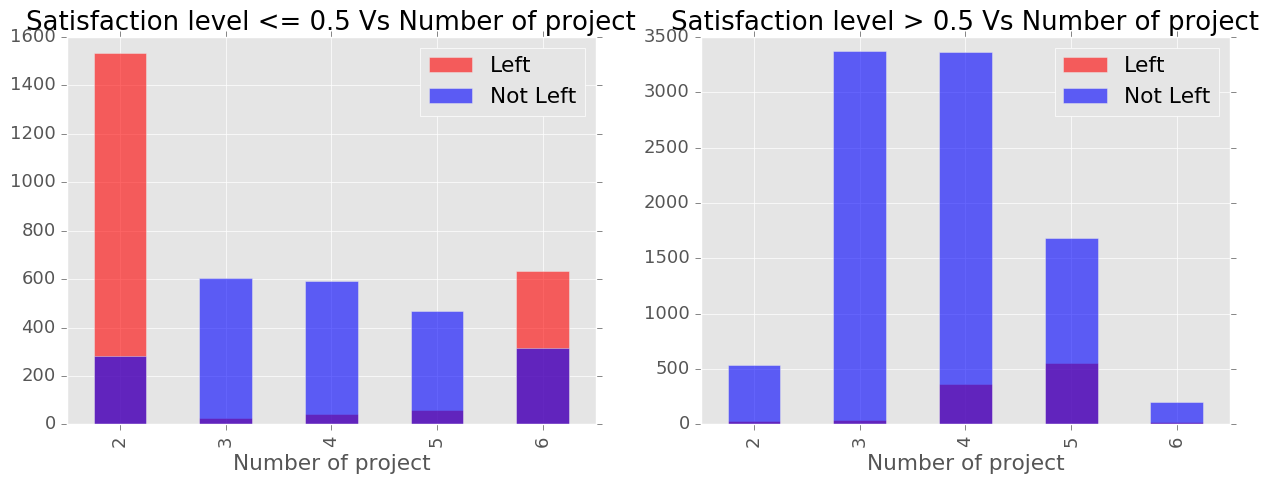

In [12]:
fig = plt.figure(figsize=(15, 5))

ax1 =  plt.subplot2grid((1,2),(0,0))
SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].number_project.value_counts().sort_index().plot(kind="bar",color="red",alpha=0.6,label="Left")
SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].number_project.value_counts().sort_index().plot(kind="bar",color="blue",alpha=0.6,label="Not Left")
ax1.set_xlabel("Number of project")
ax1.set_title("Satisfaction level <= 0.5 Vs Number of project")
plt.legend(loc="best")


ax2 =  plt.subplot2grid((1,2),(0,1))
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].number_project.value_counts().sort_index().plot(kind="bar",color="red",alpha=0.6,label="Left")
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].number_project.value_counts().sort_index().plot(kind="bar",color="blue",alpha=0.6,label="Not Left")
ax2.set_xlabel("Number of project")
ax2.set_title("Satisfaction level > 0.5 Vs Number of project")
plt.legend(loc="best")

In [13]:
SatLevel_greaterthan_5.left.groupby(SatLevel_greaterthan_5.number_project).value_counts().sort_index()

number_project  left
2               0        539
                1         33
3               0       3377
                1         44
4               0       3365
                1        365
5               0       1681
                1        554
6               0        204
                1         20
7               1          5
Name: left, dtype: int64

In [14]:
SatLevel_lessthan_5.left.groupby(SatLevel_lessthan_5.number_project).value_counts().sort_index()

number_project  left
2               0        282
                1       1534
3               0        606
                1         28
4               0        591
                1         44
5               0        468
                1         58
6               0        315
                1        635
7               1        251
Name: left, dtype: int64

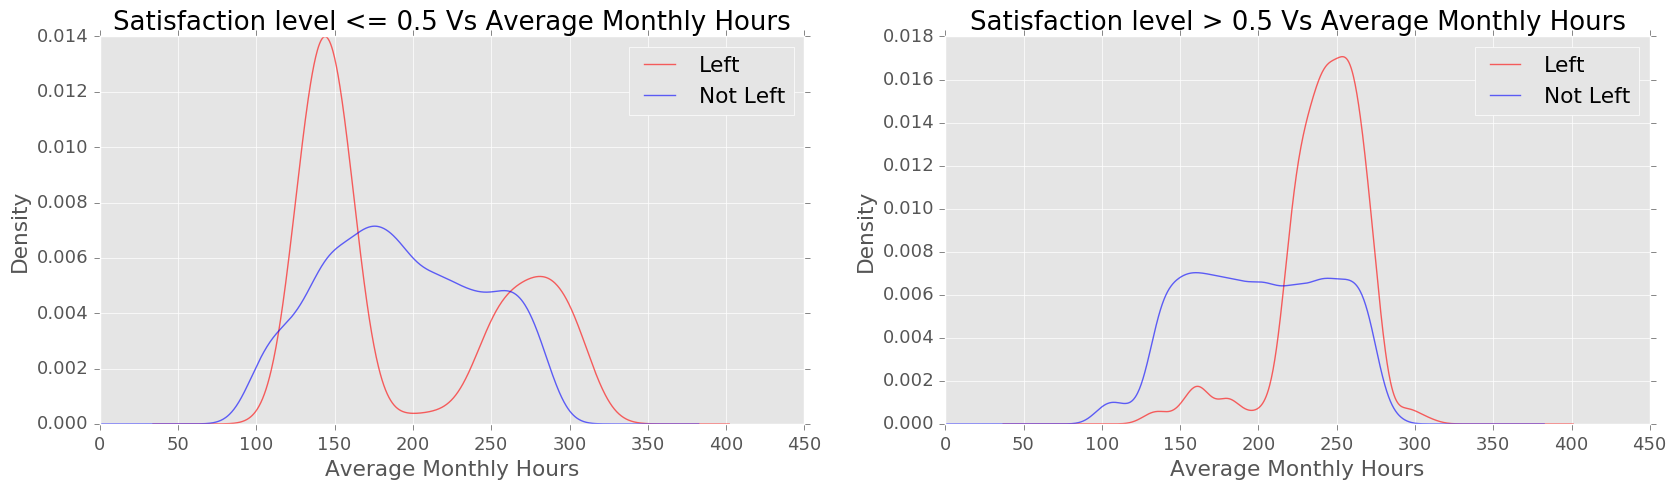

In [15]:
fig = plt.figure(figsize=(20, 5))

ax1 = plt.subplot2grid((1,2),(0,0))
SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].average_monthly_hours.plot(kind="density",color="red",alpha=0.6,label="Left")
SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].average_monthly_hours.plot(kind="density",color="blue",alpha=0.6,label="Not Left")
ax1.set_xlabel("Average Monthly Hours")
ax1.set_title("Satisfaction level <= 0.5 Vs Average Monthly Hours")
plt.legend(loc="best")


ax2 = plt.subplot2grid((1,2),(0,1))
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].average_monthly_hours.plot(kind="density",color="red",alpha=0.6,label="Left")
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].average_monthly_hours.plot(kind="density",color="blue",alpha=0.6,label="Not Left")
ax2.set_xlabel("Average Monthly Hours")
ax2.set_title("Satisfaction level > 0.5 Vs Average Monthly Hours")
plt.legend(loc="best")

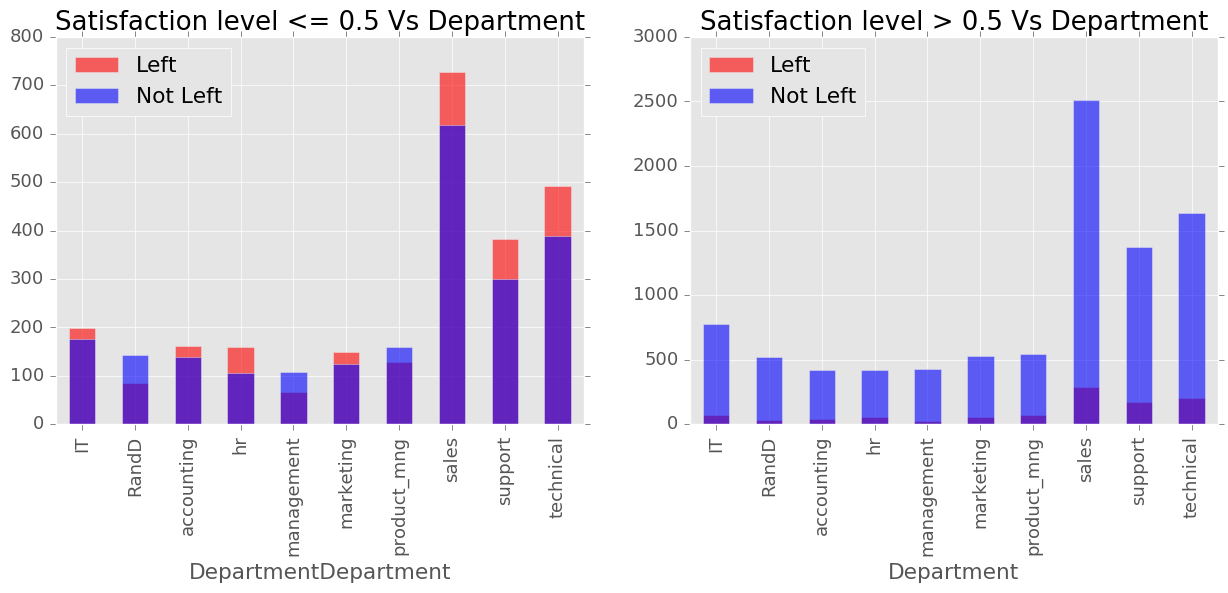

In [16]:
fig = plt.figure(figsize=(15, 5))

ax1 =  plt.subplot2grid((1,2),(0,0))
SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].Department.value_counts().sort_index().plot(kind="bar",color="red",alpha=0.6,label="Left")
SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].Department.value_counts().sort_index().plot(kind="bar",color="blue",alpha=0.6,label="Not Left")
ax1.set_xlabel("DepartmentDepartment")
ax1.set_title("Satisfaction level <= 0.5 Vs Department")
plt.legend(loc="best")


ax2 =  plt.subplot2grid((1,2),(0,1))
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].Department.value_counts().sort_index().plot(kind="bar",color="red",alpha=0.6,label="Left")
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].Department.value_counts().sort_index().plot(kind="bar",color="blue",alpha=0.6,label="Not Left")
ax2.set_xlabel("Department")
ax2.set_title("Satisfaction level > 0.5 Vs Department")
plt.legend(loc="best")

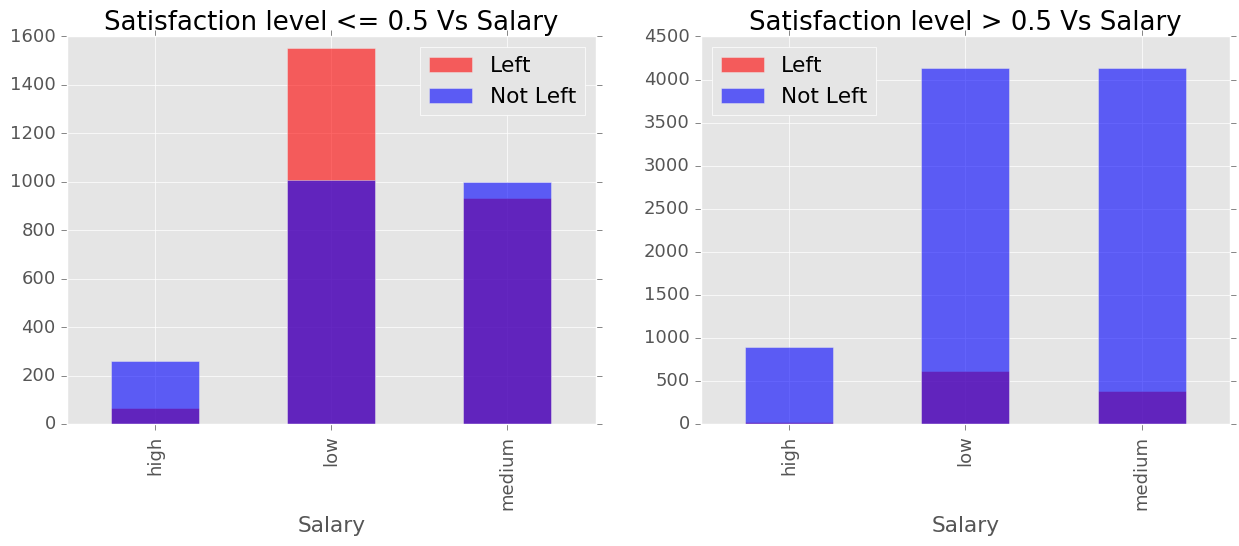

In [17]:
fig = plt.figure(figsize=(15, 5))

ax1 =  plt.subplot2grid((1,2),(0,0))
SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].salary.value_counts().sort_index().plot(kind="bar",color="red",alpha=0.6,label="Left")
SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].salary.value_counts().sort_index().plot(kind="bar",color="blue",alpha=0.6,label="Not Left")
ax1.set_xlabel("Salary")
ax1.set_title("Satisfaction level <= 0.5 Vs Salary")
plt.legend(loc="best")


ax2 =  plt.subplot2grid((1,2),(0,1))
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].salary.value_counts().sort_index().plot(kind="bar",color="red",alpha=0.6,label="Left")
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].salary.value_counts().sort_index().plot(kind="bar",color="blue",alpha=0.6,label="Not Left")
ax2.set_xlabel("Salary")
ax2.set_title("Satisfaction level > 0.5 Vs Salary")
plt.legend(loc="best")

### Looking for those who left job even their satisfaction level > 0.5

In [18]:
HR_By_Left = SatLevel_greaterthan_5.groupby('left')
HR_GreaterSat_Left = HR_By_Left.get_group(1)

In [19]:
HR_GreaterSat_Left.shape

(1021, 10)

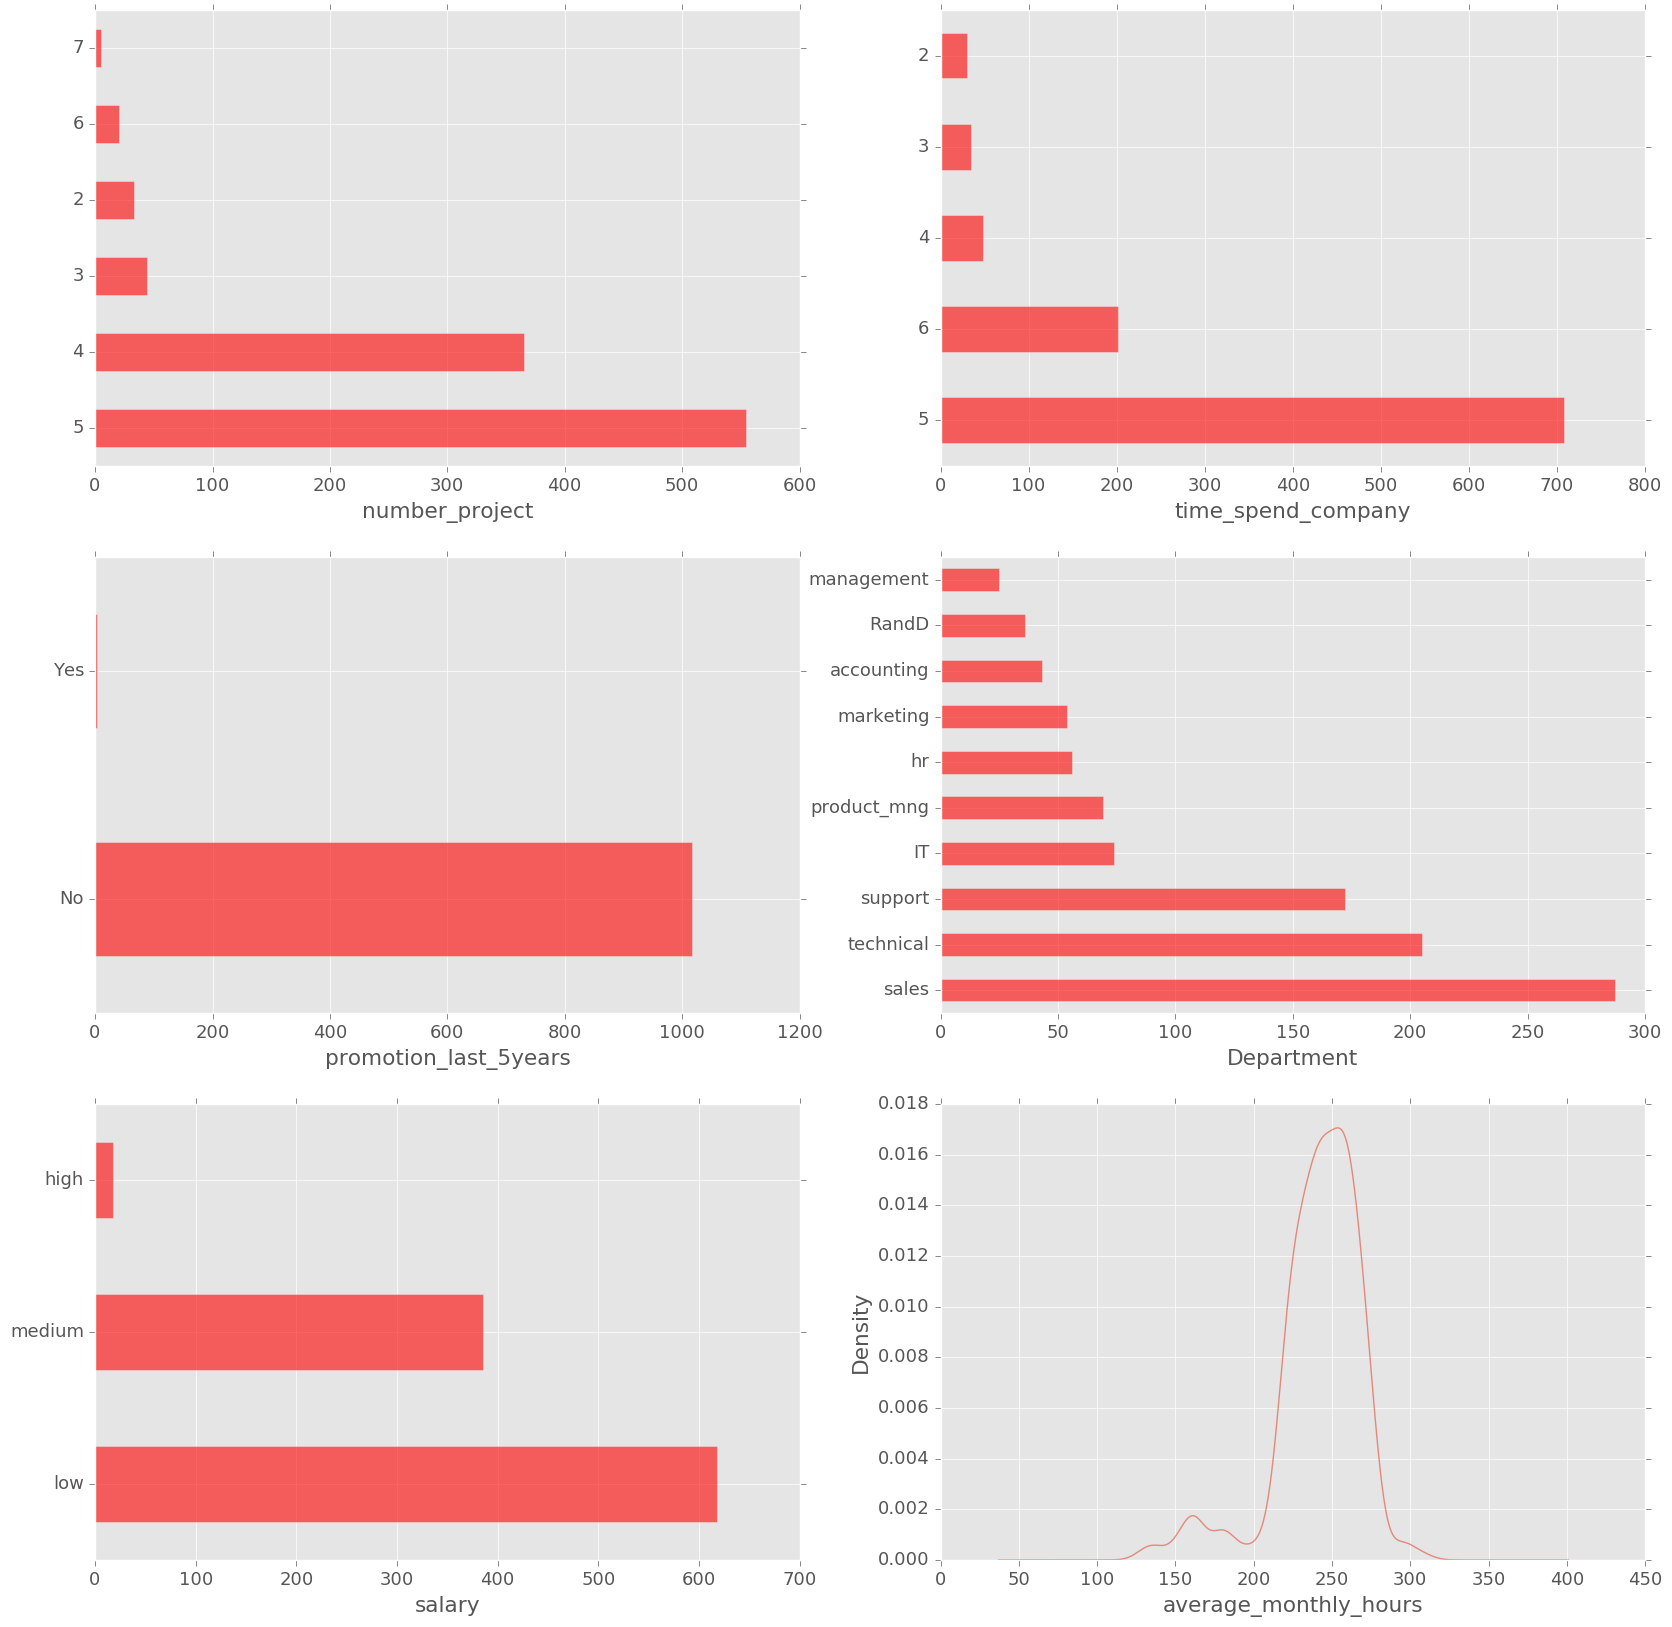

In [20]:
plt.figure(figsize=(20,20))
alpha=0.6

ax1 = plt.subplot2grid((3,2),(0,0))
HR_GreaterSat_Left.number_project.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax1.set_xlabel("number_project")

ax2 = plt.subplot2grid((3,2),(0,1))
HR_GreaterSat_Left.time_spend_company.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax2.set_xlabel("time_spend_company")

ax3 = plt.subplot2grid((3,2),(1,0))
HR_GreaterSat_Left.promotion_last_5years.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax3.set_xlabel("promotion_last_5years")
ax3.set_yticklabels(['No','Yes'])

ax4 = plt.subplot2grid((3,2),(1,1))
HR_GreaterSat_Left.Department.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax4.set_xlabel("Department")

ax5 = plt.subplot2grid((3,2),(2,0))
HR_GreaterSat_Left.salary.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax5.set_xlabel("salary")

ax6 = plt.subplot2grid((3,2),(2,1))
HR_GreaterSat_Left.average_monthly_hours.plot(kind="kde",alpha=alpha)
ax6.set_xlabel("average_monthly_hours")

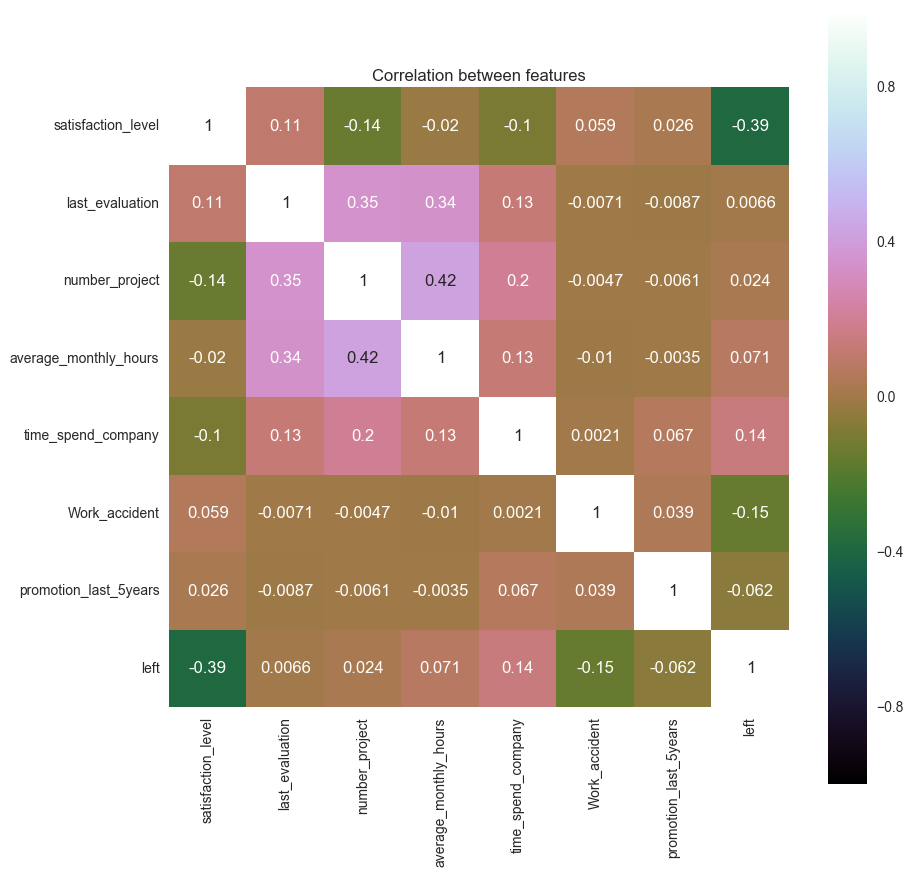

In [21]:
import seaborn as sns
corr=HRAnalysis.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

In [22]:
HRAnalysis.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left'],
      dtype='object')

In [23]:
HRAnalysis.drop('Work_accident',axis=1,inplace=True)

In [24]:
HRAnalysis.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,sales,low,1
1,0.80,0.86,5,262,6,0,sales,medium,1
2,0.11,0.88,7,272,4,0,sales,medium,1
3,0.72,0.87,5,223,5,0,sales,low,1
4,0.37,0.52,2,159,3,0,sales,low,1


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler =  StandardScaler()
HRAnalysis['number_project'] = pd.Series(scaler.fit_transform(HRAnalysis.number_project.reshape(-1,1)).reshape(-1),index=HRAnalysis.index)
HRAnalysis['average_monthly_hours'] = pd.Series(scaler.fit_transform(HRAnalysis.average_monthly_hours.reshape(-1,1)).reshape(-1),index=HRAnalysis.index)
HRAnalysis['time_spend_company'] = pd.Series(scaler.fit_transform(HRAnalysis.time_spend_company.reshape(-1,1)).reshape(-1),index=HRAnalysis.index)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [28]:
HRAnalysis = pd.get_dummies(HRAnalysis,columns=['Department','salary'])

In [39]:
HRAnalysis.drop('left',axis=1,inplace=True)
HRAnalysis = pd.concat([HRAnalysis,Left_Column],axis=1)

In [40]:
HRAnalysis.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'promotion_last_5years',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'left'],
      dtype='object')

### Using PCA to find feature importance

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(HRAnalysis.drop('left',1))
pca.components_.T
pca.components_.shape

(19, 19)

In [32]:
Collabel = []
for i in range(1,len(HRAnalysis.columns)):
    Collabel.append('PC'+str(i))

In [41]:
pca_loadings = pd.DataFrame(pca.components_.T,index=HRAnalysis.columns[:-1],columns=Collabel)
pca_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
satisfaction_level,-0.024888,-0.016244,-0.037198,-0.019027,0.001918,0.008580,0.036780,0.031271,0.052170,0.943007,-0.168152,-0.129156,0.161889,0.023742,-0.033568,-0.169720,-0.036311,1.537830e-17,-3.312027e-17
last_evaluation,0.056879,-0.015207,0.001684,0.000563,-0.007460,0.006256,-0.009993,0.000571,0.005029,0.164309,-0.036042,-0.018071,0.045014,0.008068,-0.001005,0.977425,0.101167,-6.484540e-18,4.251660e-16
number_project,0.660114,-0.189134,0.724073,-0.012876,0.020361,0.008643,0.011840,-0.001014,-0.000979,0.030164,-0.010091,0.000592,0.006742,0.006636,-0.000597,-0.047778,-0.003759,3.456614e-17,-2.082330e-17
average_monthly_hours,0.629467,-0.382286,-0.675046,0.003659,-0.004058,0.000890,0.002319,0.000654,-0.003811,-0.021059,0.005276,0.001861,-0.004963,-0.001486,0.002179,-0.037070,-0.003175,2.322367e-17,-1.789207e-17
time_spend_company,0.404865,0.902422,-0.133262,0.041539,-0.019933,-0.002237,-0.025360,-0.000150,0.005488,0.018437,0.000355,-0.006259,-0.000180,0.001015,-0.023886,-0.012167,-0.007715,-5.075626e-18,1.413113e-18


In [43]:
HRAnalysis_Plot = pd.DataFrame(pca.fit_transform(HRAnalysis.drop('left',1)),index=HRAnalysis.index,columns=pca_loadings.columns)
HRAnalysis_Plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.672721,0.298304,-0.412237,0.683600,0.738302,-0.113617,-0.123419,0.043402,0.008912,-0.268380,0.052885,0.032872,-0.050077,-0.014754,0.024803,-0.031564,-0.013350,-5.156906e-17,6.507508e-16
1,2.113246,0.930822,-0.381480,-0.674472,0.752263,-0.095035,-0.159631,0.065090,0.042255,0.226283,-0.029416,-0.022292,0.035839,0.005123,-0.042336,0.007427,-0.043121,3.573941e-16,-1.235313e-16
2,2.774154,-0.677840,0.866511,-0.738393,0.810319,-0.083564,-0.130795,0.042216,-0.003510,-0.401632,0.070085,0.076371,-0.064772,-0.002017,0.012992,0.075798,-0.012209,-3.128896e-16,7.861016e-17
3,1.331304,0.558174,0.263419,0.707716,0.753310,-0.089424,-0.117165,0.052417,0.028458,0.178951,-0.033644,-0.021859,0.029875,0.011641,-0.018244,0.061107,-0.015211,-2.710245e-16,4.373046e-16
4,-1.647833,0.283309,-0.438915,0.683931,0.738195,-0.113729,-0.123594,0.043110,0.008187,-0.280297,0.055138,0.034419,-0.052344,-0.015132,0.025236,-0.041126,-0.014125,8.195966e-16,4.953080e-16


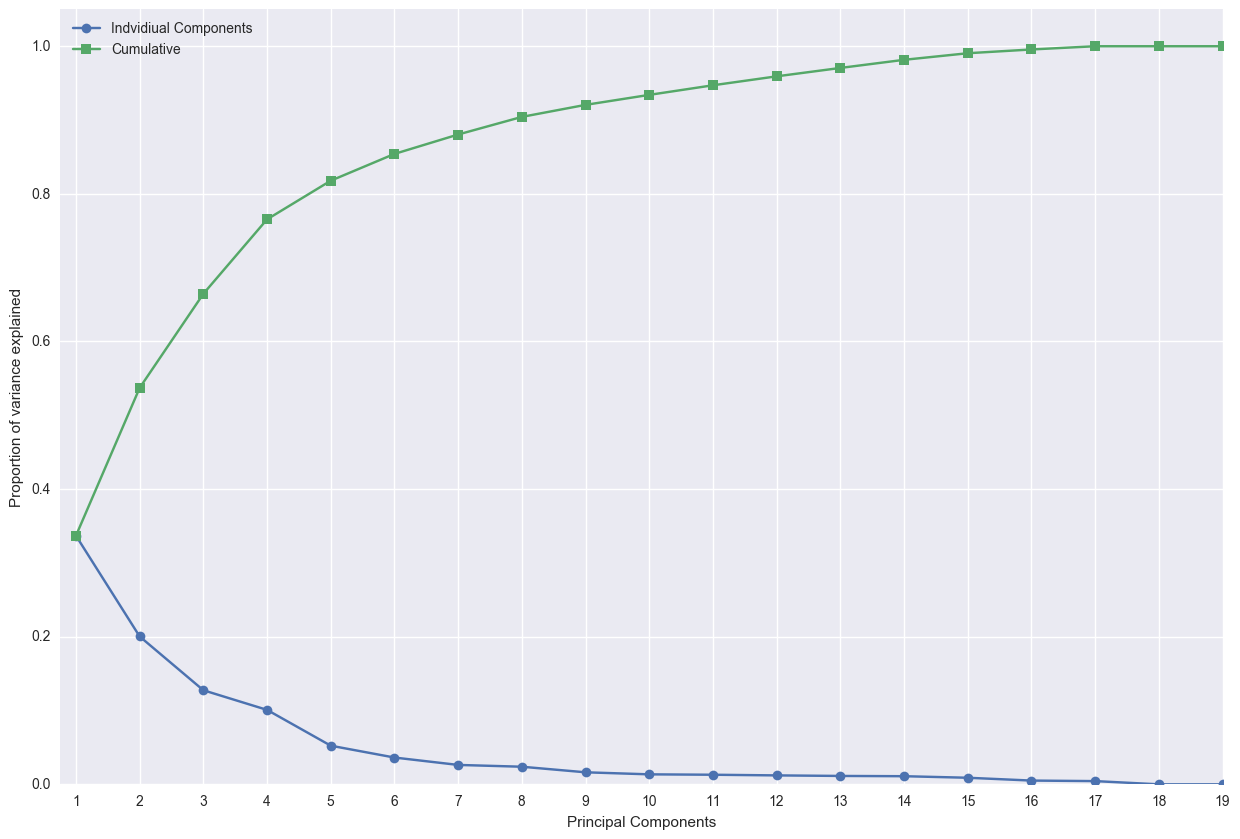

In [44]:
import numpy as np
plt.figure(figsize=(15,10))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],pca.explained_variance_ratio_,'-o',label='Indvidiual Components')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],np.cumsum(pca.explained_variance_ratio_),'-s',label='Cumulative')

plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal Components')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(loc='best')
plt.show()

In [47]:
comp_df = pd.DataFrame(pca.components_, columns=HRAnalysis.columns[:-1])
comp_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,-0.024888,0.056879,0.660114,0.629467,0.404865,0.002059,0.000776,-0.000428,0.000741,-0.004937,0.007318,-0.002441,-0.000743,-0.001460,-0.003490,0.004664,0.001184,-0.008418,0.007234
1,-0.016244,-0.015207,-0.189134,-0.382286,0.902422,0.010839,-0.002850,-0.005161,0.000816,-0.002504,0.024210,0.005197,-0.000426,0.012114,-0.012413,-0.018983,0.014571,-0.034420,0.019849
2,-0.037198,0.001684,0.724073,-0.675046,-0.133262,-0.003267,-0.000713,0.004497,0.001050,-0.003890,-0.003584,-0.005696,0.002319,-0.014700,0.005277,0.015441,-0.004399,0.013941,-0.009542
3,-0.019027,0.000563,-0.012876,0.003659,0.041539,-0.013723,-0.000925,-0.007503,-0.003052,-0.008623,-0.008059,-0.003210,0.000976,0.016705,0.007543,0.006148,-0.009236,0.710602,-0.701366
4,0.001918,-0.007460,0.020361,-0.004058,-0.019933,0.007236,-0.065219,-0.034316,-0.034446,-0.032392,-0.031209,-0.040571,-0.042247,0.885510,-0.206494,-0.398616,-0.028355,0.006405,0.021950


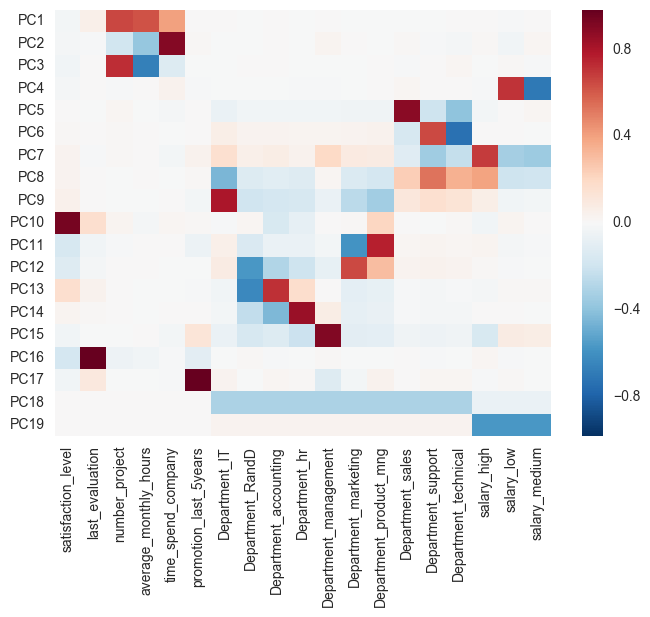

In [50]:
import seaborn as sns
sns.heatmap(comp_df, yticklabels=Collabel);

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [69]:
X = HRAnalysis.drop(['left'], axis=1)
y = HRAnalysis.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
model1 = RandomForestClassifier(criterion='entropy',n_estimators=500,min_samples_leaf=12,min_samples_split=5,random_state=101)

In [98]:
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=101,
            verbose=0, warm_start=False)

In [57]:
model1.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
print(classification_report(model1.predict(X_test),y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      3497
          1       0.92      0.98      0.95      1003

avg / total       0.98      0.98      0.98      4500



In [61]:
print(accuracy_score(model1.predict(X_test),y_test))

0.976888888889


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import make_scorer
parameter = {}

In [90]:
scoring = make_scorer(accuracy_score,greater_is_better=True)

In [92]:
model = GridSearchCV(model1,param_grid=parameter,scoring=scoring,cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=101,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [99]:
model1.base_estimator.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
print(accuracy_score(model1.base_estimator.predict(X_test),y_test))

0.980222222222


In [105]:
model1.feature_importances_

array([ 0.31235549,  0.11751406,  0.16908665,  0.14862182,  0.21997708,
        0.00141561,  0.0009596 ,  0.0009979 ,  0.0005855 ,  0.00148869,
        0.00112921,  0.00051258,  0.00081799,  0.00295454,  0.00169345,
        0.003334  ,  0.0058521 ,  0.0071749 ,  0.00352882])

In [113]:
features_order = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                  'time_spend_company', 'promotion_last_5years', 'Department_IT', 'Department_RandD',
                  'Department_accounting','Department_hr', 'Department_management', 'Department_marketing',
                  'Department_product_mng', 'Department_sales', 'Department_support',
                   'Department_technical', 'salary_high', 'salary_low', 'salary_medium']
feature_importance_dict = {key: val for key, val in zip(features_order, model1.feature_importances_)}

In [114]:
print([(k, feature_importance_dict[k]) for k in sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)])

[('satisfaction_level', 0.31235549108282973), ('time_spend_company', 0.21997708227968174), ('number_project', 0.16908665077238505), ('average_montly_hours', 0.1486218158853293), ('last_evaluation', 0.11751405636184163), ('salary_low', 0.0071749005223384118), ('salary_high', 0.0058521038620096234), ('salary_medium', 0.0035288232675299682), ('Department_technical', 0.0033340036418187976), ('Department_sales', 0.0029545412195134371), ('Department_support', 0.0016934480727192284), ('Department_hr', 0.0014886910382211993), ('promotion_last_5years', 0.0014156052349980576), ('Department_management', 0.0011292131519302416), ('Department_RandD', 0.00099790496050668567), ('Department_IT', 0.00095959856906809309), ('Department_product_mng', 0.0008179922500041216), ('Department_accounting', 0.00058549885848193555), ('Department_marketing', 0.00051257896879301204)]
